# Fantasy Football Project
## An Analysis on Running Backs
### Memphis Lau

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns

In this project I will analyze the most unpredictable position in fantasy football: the running back. As an introduction, fantasy football is a game in which people take turns drafting real-life NFL players onto a team. The players' performance in real life correlate to their score in fantasy football. In standard leagues, every yard earned (whether the player ran with the ball or caught the ball) is worth 0.1 points, while every catch is worth 1 point, and every touchdown score is worth 6. 

## Importing and Cleaning Data

This analysis will use the data from the 2020 and 2021 seasons.

In [2]:
rbs_2021 = pd.read_csv(r"C:\Users\laume\DataRes Fall\RB_2021.csv")
rbs_2020 = pd.read_csv(r"C:\Users\laume\DataRes Fall\RB_2020.csv")

The data is also a missing category for total scrimmage yards (running yards + receiving yards), so I will add this column to the data.

In [3]:
rbs_2020.loc[:,'YDS'] = rbs_2020.loc[:,'YDS'].astype(str).str.replace(",", "").astype(float)
rbs_2021.loc[:,'YDS'] = rbs_2021.loc[:,'YDS'].astype(str).str.replace(",", "").astype(float)
rbs_2020['TotalYDS'] = rbs_2020['YDS'].astype(float) + rbs_2020['YDS.1']
rbs_2021['TotalYDS'] = rbs_2021['YDS'].astype(float) + rbs_2021['YDS.1']
rbs_2020['RFPTS'] = rbs_2020.YDS * 0.1 + rbs_2020.TD * 6
rbs_2021['RFPTS'] = rbs_2021.YDS * 0.1 + rbs_2021.TD * 6
rbs_2020 = rbs_2020.drop(np.arange(159, 186), axis = 0)
rbs_2021 = rbs_2021.drop(np.arange(164, 198), axis = 0)

For the purposes of this research, I will only look at the top 40 running-backs for each season.

In [4]:
rb_2020 = rbs_2020.iloc[:40,:]
rb_2021 = rbs_2021.iloc[:40,:]
rb_2021.head(5)

,Rank,Player,ATT,YDS,Y/A,LG,20+,TD,REC,TGT,YDS.1,Y/R,TD.1,FL,G,FPTS,FPTS/G,ROST,TotalYDS,RFPTS
0,1.0,Jonathan Taylor (IND),332.0,1811.0,5.5,83.0,30.0,18.0,40.0,51.0,360.0,9.0,2.0,2.0,17.0,373.1,21.9,100.0%,2171.0,289.1
1,2.0,Austin Ekeler (LAC),206.0,911.0,4.4,28.0,3.0,12.0,70.0,94.0,647.0,9.2,8.0,3.0,16.0,343.8,21.5,100.0%,1558.0,163.1
2,3.0,Najee Harris (PIT),307.0,1200.0,3.9,37.0,8.0,7.0,74.0,94.0,467.0,6.3,3.0,0.0,17.0,300.7,17.7,98.8%,1667.0,162.0
3,4.0,Joe Mixon (CIN),292.0,1205.0,4.1,32.0,7.0,13.0,42.0,48.0,314.0,7.5,3.0,1.0,16.0,287.9,18.0,99.9%,1519.0,198.5
4,5.0,James Conner (ARI),202.0,752.0,3.7,35.0,4.0,15.0,37.0,39.0,375.0,10.1,3.0,0.0,15.0,257.7,17.2,92.9%,1127.0,165.2


## What makes this difficult?

Predicting the next breakout running backs is very difficult. Because running backs get tackled so often and rely so much on their speed and athleticism, injuries and age affect this position exponentially more than others. The following code shows that only 3 of the top 10 running backs in 2021 were also top 10 in 2020.

In [5]:
both_top_10 = rb_2021.Player[np.arange(0,10)][np.isin(rb_2021.Player[np.arange(0,10)], rb_2020.Player[np.arange(0, 10)])]
print(both_top_10)

0    Jonathan Taylor (IND)
6    Ezekiel Elliott (DAL)
7        Alvin Kamara (NO)
Name: Player, dtype: object


In fact, out of the players that appeared in both top 40 lists for 2021 and 2020, the average difference in rank is 11.68, meaning that predicting a player's performance for one year does not rely on their performance in previous years, which could be argued for other positions in football.

In [6]:
repeat_name = rb_2021.Player[rb_2021.Player.isin(rb_2020.Player)]
repeats = rb_2021[rb_2021.Player.isin(repeat_name)]
format_row = "{:<30} {:<30}"
print(format_row.format("Player", "Difference in Rank"))
print(format_row.format("-" * 6, "-" * 18))
count = 0
for row in np.arange(0, len(repeats)):
    player = repeats.iloc[row].Player
    current = repeats.iloc[row].Rank
    past = rb_2020.Player[rb_2020.Player == player].index[0] + 1.
    count += np.absolute(current - past)
    print(format_row.format(player, np.absolute(current - past)))

Player                         Difference in Rank            
------                         ------------------            
Jonathan Taylor (IND)          5.0                           
Austin Ekeler (LAC)            24.0                          
James Conner (ARI)             22.0                          
Leonard Fournette (TB)         29.0                          
Ezekiel Elliott (DAL)          2.0                           
Alvin Kamara (NO)              7.0                           
Antonio Gibson (WAS)           3.0                           
Aaron Jones (GB)               6.0                           
Josh Jacobs (LV)               4.0                           
Nick Chubb (CLE)               2.0                           
D'Andre Swift (DET)            3.0                           
Dalvin Cook (MIN)              14.0                          
Devin Singletary (BUF)         13.0                          
David Montgomery (CHI)         16.0                          
Melvin G

In [7]:
count / len(repeats)

11.681818181818182

Now what happened to the 18 players who appeared in the top 40 in 2020 and did not in 2021? Data shows that these 18 players played on average only 10 games (out of a 17 game season) in 2021, compared to the 14.4 played games on average for the 22 that remained. Injuries heavily affected these players' performances and add another element of unpredictability to the running back position. 

In [8]:
regressed_names = rb_2020.Player[~rb_2020.Player.isin(rb_2021.Player)]
regressed_players = rbs_2021[rbs_2021.Player.isin(regressed_names)]
regressed_players.G.mean()

10.6

In [9]:
repeats.G.mean()

14.363636363636363

While it may seem obvious, injuries play a large role in a player's fantasy performance. This graphic shows the correlation between games played and fantasy rank in both 2020 and 2021. 

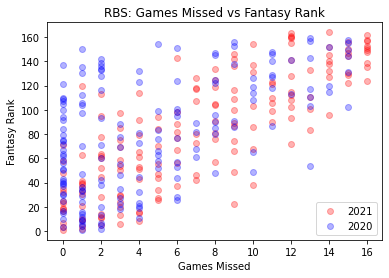

In [10]:
rbs_2021['GM'] = 17 - rbs_2021['G']
rbs_2020['GM'] = 16 - rbs_2020['G']
plt.scatter(rbs_2021.GM, rbs_2021.Rank, c = 'r', alpha = 0.3)
plt.scatter(rbs_2020.GM, rbs_2020.Rank, c = 'b', alpha = 0.3)
plt.xlabel("Games Missed")
plt.ylabel("Fantasy Rank")
plt.title("RBS: Games Missed vs Fantasy Rank")
plt.legend(['2021', '2020'])
plt.show()

## Exploring Predictors for a Breakout RB

My hypothesis is that age and experience in the league have a large impact. I will add columns to the top 40 RBs in 2021 and 2020.

In [11]:
# Age at the beginning of the season
ages_2021 = np.array([22, 26, 23, 25, 26, 26, 26, 26, 30, 23, 26, 23, 25, 24, 22, 26, 21, 24, 26, 24, 28, 27, 23, 23, 24, 23, 24, 24, 22, 24, 29, 26, 29, 25, 28, 22, 28, 25, 24, 32])
ages_2021 = np.append(ages_2021, np.zeros(124))
# Which year a player is in
years_2021 = np.array([2, 5, 1, 5, 5, 5, 6, 5, 9, 2, 5, 3, 4, 3, 2, 5, 1, 3, 4, 3, 7, 6, 2, 3, 3, 1, 3, 3, 1, 4, 8, 4, 6, 4, 7, 1, 6, 5, 3, 9])
years_2021 = np.append(years_2021, np.zeros(124))
rbs_2021['AGE'] = ages_2021
rbs_2021['YR'] = years_2021

In [12]:
ages_2020 = np.array([25, 25, 26, 23, 25, 21, 22, 22, 25, 25, 27, 22, 27, 23, 26, 27, 21, 26, 23, 29, 21, 23, 21, 24, 25, 25, 23, 26, 28, 23, 23, 26, 30, 25, 23, 25, 25, 28, 35]) 
ages_2020 = np.append(ages_2020, np.zeros(120))            
years_2020 = np.array([4, 4, 5, 2, 4, 1, 2, 2, 5, 4, 6, 1, 6, 3, 5, 5, 1, 4, 3, 6, 1, 2, 1, 3, 4, 4, 2, 6, 8, 2, 3, 4, 7, 4, 2, 3, 4, 5, 14])
years_2020 = np.append(years_2020, np.zeros(120))
rbs_2020['AGE'] = ages_2020
rbs_2020['YR'] = years_2020

In [13]:
rb_2020 = rbs_2020.iloc[:40,:]
rb_2021 = rbs_2021.iloc[:40,:]

### Age

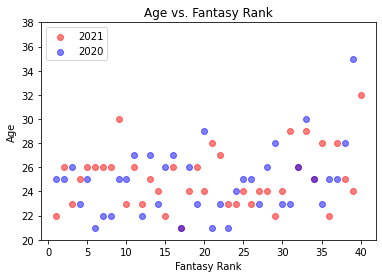

In [14]:
plt.scatter(rb_2021.Rank, rb_2021.AGE, c = 'r', alpha = 0.5)
plt.scatter(rb_2020.Rank, rb_2020.AGE, c = 'b', alpha = 0.5)
plt.title("Age vs. Fantasy Rank")
plt.ylabel("Age")
plt.ylim([20, 38])
plt.xlabel("Fantasy Rank")
plt.legend(['2021', '2020'])
plt.show()

This graphic shows there is not a strong correlation between age and Fantasy Rank, but it is worth noting that there has only been one top-20 RB in the last two years that was 28 years or older at the time. 

In [15]:
print("2020 Age Mean and Median: ", np.mean(rb_2020.AGE), ',', np.median(rb_2020.AGE))
print("2021 Age Mean and Median: ", np.mean(rb_2021.AGE), ',', np.median(rb_2021.AGE))

2020 Age Mean and Median:  24.225 , 25.0
2021 Age Mean and Median:  25.1 , 25.0


Though these statistics do not prove any correlation, it is interesting to note that the median age for the top 40 RBs is 25.

### Years in the League

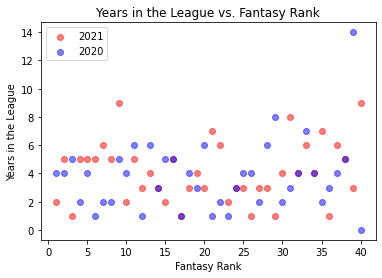

In [16]:
plt.scatter(rb_2021.Rank, rb_2021.YR, c = 'r', alpha = 0.5)
plt.scatter(rb_2020.Rank, rb_2020.YR, c = 'b', alpha = 0.5)
plt.title("Years in the League vs. Fantasy Rank")
plt.ylabel("Years in the League")
plt.xlabel("Fantasy Rank")
plt.legend(['2021', '2020'])
plt.show()

We can see that years in the league does not prove anything with relation to Fantasy Rank. Rookies are prevalent in the top 10 in both years, as well as 5th year players, etc. An interesting thing to note is that there are no 3rd year RBs that have finished in the top 10 in 2020 and 2021.

### Performance Stats

We will first compare total yards (running and receiving) of RBs with their fantasy Rank.

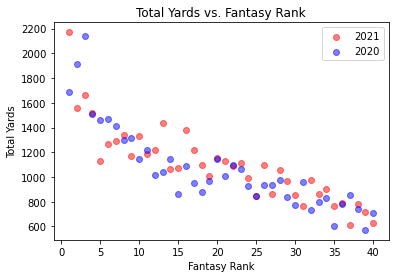

In [17]:
plt.scatter(rb_2021.Rank, rb_2021['TotalYDS'], c = 'r', alpha = 0.5)
plt.scatter(rb_2020.Rank, rb_2020['TotalYDS'], c = 'b', alpha = 0.5)
plt.title("Total Yards vs. Fantasy Rank")
plt.ylabel("Total Yards")
plt.xlabel("Fantasy Rank")
plt.legend(['2021', '2020'])
plt.show()

As expected, there is avery strong correlation with total yards and fantasy rank, as yards make up the majority of fantasy points. A more interesting question is how important receiving yards are compared to running.

### Run vs Receiving Game

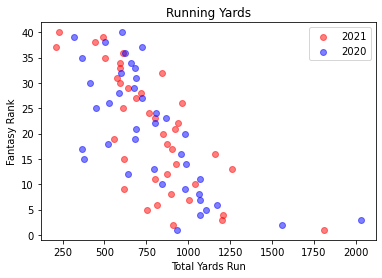

In [18]:
plt.scatter(rb_2021.YDS, rb_2021.Rank, c = 'r', alpha = 0.5)
plt.scatter(rb_2020.YDS, rb_2020.Rank, c = 'b', alpha = 0.5)
plt.xlabel("Total Yards Run")
plt.ylabel("Fantasy Rank")
plt.title("Running Yards")
plt.legend(['2021', '2020'])
plt.show()

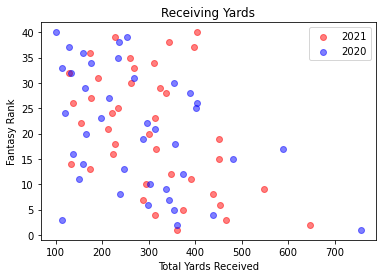

In [19]:
plt.scatter(rb_2021['YDS.1'], rb_2021.Rank, c = 'r',alpha = 0.5)
plt.scatter(rb_2020['YDS.1'], rb_2020.Rank, c = 'b', alpha = 0.5)
plt.xlabel("Total Yards Received")
plt.ylabel("Fantasy Rank")
plt.title("Receiving Yards")
plt.legend(['2021', '2020'])
plt.show()

As we can see, the trend for Running Yards vs Fantasy Rank is much stronger than that of receiving yards. We will investigate this further to see if receiving yards are actually not a great indicator of fantasy success.

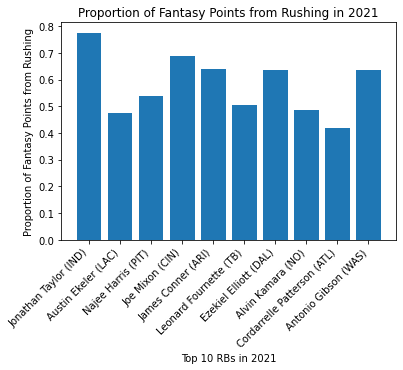

In [20]:
plt.bar(rb_2021.Player[np.arange(0, 10)], rb_2021.RFPTS[np.arange(0,10)] / rb_2021.FPTS[np.arange(0,10)])
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel("Top 10 RBs in 2021")
plt.ylabel("Proportion of Fantasy Points from Rushing")
plt.title("Proportion of Fantasy Points from Rushing in 2021")
plt.show()

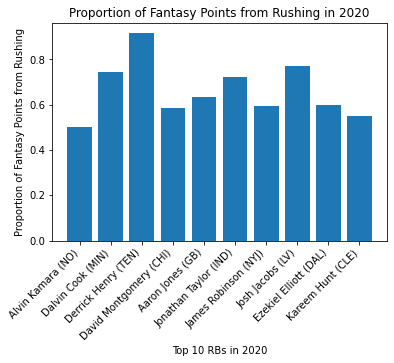

In [21]:
plt.bar(rb_2020.Player[np.arange(0, 10)], rb_2020.RFPTS[np.arange(0,10)] / rb_2020.FPTS[np.arange(0,10)])
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel("Top 10 RBs in 2020")
plt.ylabel("Proportion of Fantasy Points from Rushing")
plt.title("Proportion of Fantasy Points from Rushing in 2020")
plt.show()

As seen with the top 10 RBs in both 2020 and 2021, the proportion of their fantasy points coming from rushing plays varies a lot. It cannot be proven that more receiving work equates to success. Of course, being a running back that can catch balls is helpful, such as in the case of Alvin Kamara (rank 1 in 2020), but it is not essential to fantasy football success. The following graphic illustrates this better:

In [22]:
proportions_2020 = []
proportions_2021 = []
for i in np.arange(0,5):
    j = i * 20
    proportions_2020.append(np.mean(rbs_2020.RFPTS[j:j+20, ] / rbs_2020.FPTS[j:j+20, ]))
    proportions_2021.append(np.mean(rbs_2021.RFPTS[j:j+20, ] / rbs_2021.FPTS[j:j+20, ]))

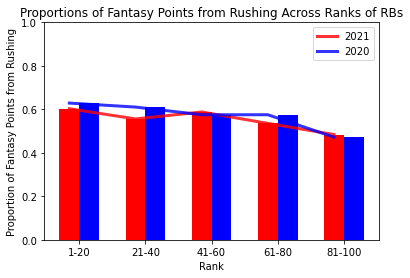

In [23]:
plt.figure()
ind = np.arange(5)
width = 0.3
plt.bar(ind, proportions_2021, width, color = 'r', label = '2020')
plt.bar(ind + width, proportions_2020, width, color = 'b', label = '2021')
plt.ylim(0,1)
plt.plot(proportions_2021, linewidth = 3, c = 'r', alpha = 0.8)
plt.plot(proportions_2020, linewidth = 3, c = 'b', alpha = 0.8)
plt.xticks(ind + width / 2, ('1-20', '21-40', '41-60', '61-80', '81-100'))
plt.xlabel("Rank")
plt.ylabel("Proportion of Fantasy Points from Rushing")
plt.title("Proportions of Fantasy Points from Rushing Across Ranks of RBs")
plt.legend(['2021', '2020'])
plt.show()

In both 2020 and 2021, the proportion of fantasy points coming from rushing is relatively similar for the top 20 RBs, those ranked 21-40, etc. The amount of rushing vs receiving for a RB is not an indicator of how well they will do in Fantasy Football.

### Running Stats

Now we will focus on the statistics of running. Obviously, rushing yards will correlate to more fantasy points. We will look at rushing attempts first.

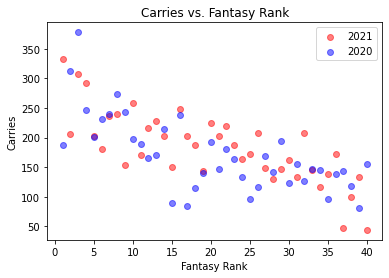

In [24]:
plt.scatter(rb_2021.Rank, rb_2021.ATT, c = 'r',alpha = 0.5)
plt.scatter(rb_2020.Rank, rb_2020.ATT, c = 'b',alpha = 0.5)
plt.title("Carries vs. Fantasy Rank")
plt.ylabel("Carries")
plt.xlabel("Fantasy Rank")
plt.legend(['2021', '2020'])
plt.show()

There is a noticeable correlation between the amount of carries an RB has and their respective rank in Fantasy Fotball. We see that the more a running back is involved in his offense, the more likely they will succeed fantasy-wise. 

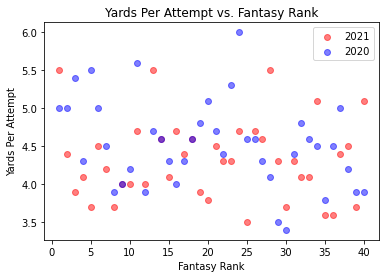

In [25]:
plt.scatter(rb_2021.Rank, rb_2021['Y/A'], c = 'r', alpha = 0.5)
plt.scatter(rb_2020.Rank, rb_2020['Y/A'], c = 'b', alpha = 0.5)
plt.title("Yards Per Attempt vs. Fantasy Rank")
plt.ylabel("Yards Per Attempt")
plt.xlabel("Fantasy Rank")
plt.legend(['2021', '2020'])
plt.show()

Meanwhile, a running back's average yards per carry does not have a correlation with Fantasy Rank. We see that the points are scattered without a pattern. In terms of fantasy football, we can conclude that volume and quantity of runs are better than the quality of those runs.

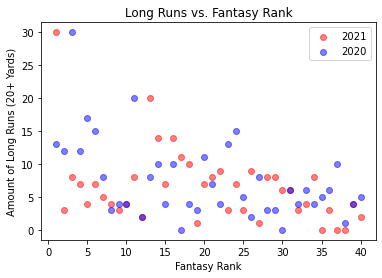

In [26]:
plt.scatter(rb_2021.Rank, rb_2021['20+'], c = 'r', alpha = 0.5)
plt.scatter(rb_2020.Rank, rb_2020['20+'], c = 'b', alpha = 0.5)
plt.title("Long Runs vs. Fantasy Rank")
plt.ylabel("Amount of Long Runs (20+ Yards)")
plt.xlabel("Fantasy Rank")
plt.legend(['2021', '2020'])
plt.show()

The amount of long runs by an RB has a slight correlation with Fantasy Rank, but this could be because of the few outliers that had 30 long runs and finished high in their respective seasons. Besides those two points, the correlation seems rather weak.

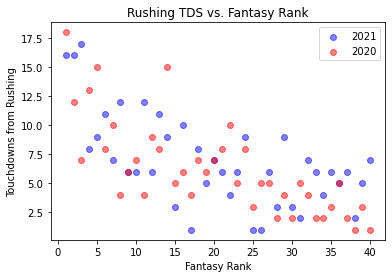

In [27]:
plt.scatter(rb_2020.Rank, rb_2020['TD'], c = 'b', alpha = 0.5)
plt.scatter(rb_2021.Rank, rb_2021['TD'], c = 'r', alpha = 0.5)
plt.title("Rushing TDS vs. Fantasy Rank")
plt.ylabel("Touchdowns from Rushing")
plt.xlabel("Fantasy Rank")
plt.legend(['2021', '2020'])
plt.show()

The amount of touchdowns does correlate strongly with a player's Fantasy Rank. This makes sense, as a touchdown is worth 6 points, a large amount when compared to the 0.1 points per yard. 

## Using 2020 to Predict 2021

Now that we have a general idea of which variables are most correlated to fantasy success, we can explore how a player's performance one year can hint at his performance the next year.

In [28]:
top10_2021 = rb_2021.Player[np.arange(10)]
print(rbs_2020[(rbs_2020.Player.isin(top10_2021))].Player)

0          Alvin Kamara (NO)
5      Jonathan Taylor (IND)
8      Ezekiel Elliott (DAL)
12      Antonio Gibson (WAS)
25       Austin Ekeler (LAC)
26        James Conner (ARI)
34    Leonard Fournette (TB)
48           Joe Mixon (CIN)
Name: Player, dtype: object


We will analyze 8 players from the top 10 in 2021 and see how they performed in 2020. We will not look at Najee Harris (3rd) because he was a rookie and thus did not play in 2020 or Cordarrelle Patterson (8th), who changed teams from 2020 to 2021. Changing teams means a changing offense and role, which my data cannot create conclusions about.

In [47]:
variables = ['ATT', 'YDS', 'Y/A', '20+', 'TD', 'RFPTS', 'AGE', 'YR', 'TotalYDS', 'GM']
format_row = "{:<30} {:<30} {:<30}"
print(format_row.format("Category (2020)", "Average of Top 10 2021 RBs", "Average of the Other Top 40 RBs"))
print(format_row.format("-" * 15, "-" * 26, "-" * 32))
for i in variables:
    print(format_row.format(i, np.mean(rbs_2020[(rbs_2020.Player.isin(top10_2021))][i]), np.mean(rb_2020[~(rb_2020.Player.isin(top10_2021))][i])))

Category (2020)                Average of Top 10 2021 RBs     Average of the Other Top 40 RBs
---------------                --------------------------     --------------------------------
ATT                            166.75                         172.0                         
YDS                            740.125                        787.9090909090909             
Y/A                            4.375                          4.539393939393939             
20+                            7.375                          7.454545454545454             
TD                             7.5                            6.696969696969697             
RFPTS                          119.0125                       118.97272727272728            
AGE                            21.125                         24.242424242424242            
YR                             3.0                            3.878787878787879             
TotalYDS                       1068.75                        1050.

In [38]:
rb_2020

,Rank,Player,ATT,YDS,Y/A,LG,20+,TD,REC,TGT,...,FL,G,FPTS,FPTS/G,ROST,TotalYDS,RFPTS,GM,AGE,YR
0,1.0,Alvin Kamara (NO),187.0,932.0,5.0,49.0,13.0,16.0,83.0,107.0,...,0.0,15.0,377.8,25.2,99.9%,1688.0,189.2,1.0,25.0,4.0
1,2.0,Dalvin Cook (MIN),312.0,1557.0,5.0,70.0,12.0,16.0,44.0,54.0,...,3.0,14.0,337.8,24.1,100.0%,1918.0,251.7,2.0,25.0,4.0
2,3.0,Derrick Henry (TEN),378.0,2027.0,5.4,94.0,30.0,17.0,19.0,31.0,...,2.0,16.0,333.1,20.8,99.9%,2141.0,304.7,0.0,26.0,5.0
3,4.0,David Montgomery (CHI),247.0,1070.0,4.3,80.0,12.0,8.0,54.0,68.0,...,1.0,15.0,264.8,17.7,94.8%,1508.0,155.0,1.0,23.0,2.0
4,5.0,Aaron Jones (GB),201.0,1104.0,5.5,77.0,17.0,9.0,47.0,63.0,...,0.0,14.0,258.9,18.5,99.6%,1459.0,164.4,2.0,25.0,4.0
5,6.0,Jonathan Taylor (IND),232.0,1169.0,5.0,62.0,15.0,11.0,36.0,40.0,...,1.0,15.0,252.8,16.9,100.0%,1468.0,182.9,1.0,21.0,1.0
6,7.0,James Robinson (NYJ),240.0,1070.0,4.5,47.0,8.0,7.0,49.0,60.0,...,1.0,14.0,250.4,17.9,85.4%,1414.0,149.0,2.0,22.0,2.0
7,8.0,Josh Jacobs (LV),273.0,1065.0,3.9,28.0,3.0,12.0,33.0,45.0,...,2.0,15.0,231.3,15.4,97.7%,1303.0,178.5,1.0,22.0,2.0
8,9.0,Ezekiel Elliott (DAL),244.0,979.0,4.0,31.0,4.0,6.0,52.0,71.0,...,5.0,15.0,223.7,14.9,97.0%,1317.0,133.9,1.0,25.0,5.0
9,10.0,Kareem Hunt (CLE),198.0,841.0,4.2,33.0,4.0,6.0,38.0,51.0,...,0.0,16.0,218.5,13.7,89.7%,1145.0,120.1,0.0,25.0,4.0
